In [1]:
!pip install imblearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing  import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from matplotlib.colors import ListedColormap
from sklearn import metrics
import seaborn as sns

In [3]:
# Reading the Dataset

In [4]:
df1 = pd.read_csv("dataset/h1n1_vaccine_prediction.csv")

In [5]:
df1.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [6]:
# Checking data is imbalanced or not.

In [7]:
df1.h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [8]:
df1.shape

(26707, 34)

In [9]:
len(df1)

26707

In [10]:
# Missing value analysis.

In [11]:
df1.isnull().sum()/len(df1)*100  

unique_id                     0.000000
h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
has_health_insur             45.957989
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                      

In [12]:
len(df1)

26707

In [13]:
# Dropping the column because it has more than 45% data is missing

In [14]:
df1 = df1.drop("has_health_insur",axis = 1)
df1 = df1.dropna()
df1.shape

(19642, 33)

In [15]:
# After Dropping

len(df1)

19642

In [16]:
# Check balance of target variable

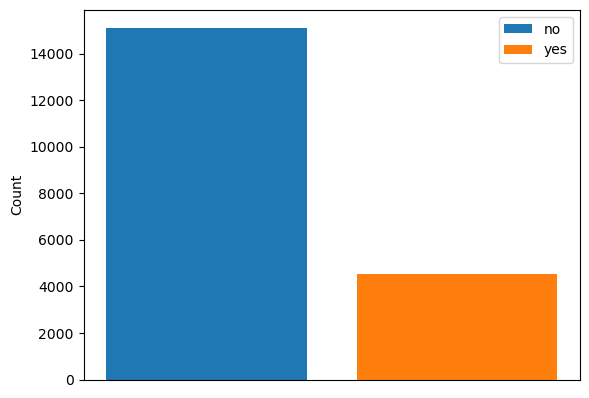

In [17]:
purchased=df1[df1.h1n1_vaccine==0].h1n1_vaccine.count()
notpurchased=df1[df1.h1n1_vaccine==1].h1n1_vaccine.count()
plt.bar(0,purchased,label='no')
plt.bar(1,notpurchased,label='yes')
plt.xticks([])
plt.ylabel('Count')
plt.legend()
plt.show()

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  19642 non-null  int64  
 1   h1n1_worry                 19642 non-null  float64
 2   h1n1_awareness             19642 non-null  float64
 3   antiviral_medication       19642 non-null  float64
 4   contact_avoidance          19642 non-null  float64
 5   bought_face_mask           19642 non-null  float64
 6   wash_hands_frequently      19642 non-null  float64
 7   avoid_large_gatherings     19642 non-null  float64
 8   reduced_outside_home_cont  19642 non-null  float64
 9   avoid_touch_face           19642 non-null  float64
 10  dr_recc_h1n1_vacc          19642 non-null  float64
 11  dr_recc_seasonal_vacc      19642 non-null  float64
 12  chronic_medic_condition    19642 non-null  float64
 13  cont_child_undr_6_mnths    19642 non-null  flo

In [19]:
 # We need to replce age bracate with labels

In [20]:
from sklearn import preprocessing
df1.age_bracket.unique()
le = preprocessing.LabelEncoder()
df1['age_bracket'] = le.fit_transform(df1.age_bracket.values)
df1['age_bracket']

0        3
1        1
3        4
4        2
5        4
        ..
26700    3
26701    0
26702    4
26703    0
26706    4
Name: age_bracket, Length: 19642, dtype: int32

In [21]:
df1.qualification = le.fit_transform(df1.qualification.values)
df1.qualification

0        1
1        0
3        0
4        3
5        0
        ..
26700    0
26701    2
26702    3
26703    2
26706    3
Name: qualification, Length: 19642, dtype: int32

In [22]:
# All column converted to numeric data

In [23]:
# Here le is the preprocessing encoder

In [24]:
df1.race = le.fit_transform(df1.race.values)
df1.sex = le.fit_transform(df1.sex.values)
df1.income_level = le.fit_transform(df1.income_level.values)
df1.marital_status = le.fit_transform(df1.marital_status.values)
df1.housing_status = le.fit_transform(df1.housing_status.values)
df1.employment = le.fit_transform(df1.employment.values)
df1.census_msa = le.fit_transform(df1.census_msa.values)


df1 

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,1,0,0,0,0,1,2.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,0,1,0,0,1,1,1.0,0.0,0
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,0,1,1,1,1,1,3.0,0.0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,0,0,1,0,1,2,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,1,0,1,1,0,1,1.0,0.0,0


In [25]:
# Creating independent feature & Dependent Feature 

In [26]:
x= df1.drop("h1n1_vaccine",axis = 1) #independent feature
y= df1['h1n1_vaccine'] # dependent feature 

In [27]:
#before smot
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(x_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
score1 = metrics.accuracy_score(y_test, y_pred)
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8241282769152456


In [28]:
#Over sampling the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_smot, y_smot = oversample.fit_resample(x, y)

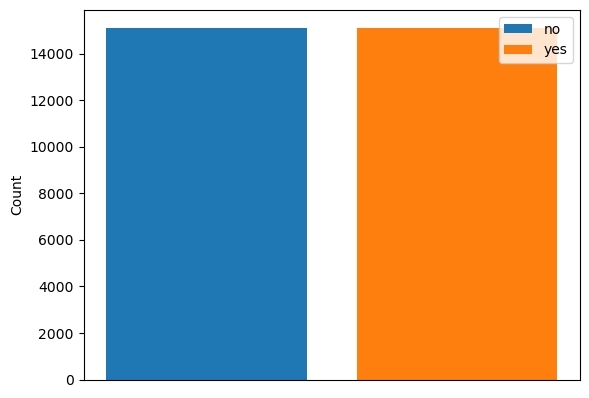

In [29]:
# after smot all class are equale.
purchased=y_smot[y_smot==0].count()
notpurchased=y_smot[y_smot==1].count()
plt.bar(0,purchased,label='no')
plt.bar(1,notpurchased,label='yes')
plt.xticks([])
plt.ylabel('Count')
plt.legend()
plt.show()

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_smot, y_smot,test_size=0.20)

In [31]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(x_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
score2 =  metrics.accuracy_score(y_test, y_pred)
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8919365499008592


In [32]:
print("before smot accuracy is:",score1)
print("after smot accuracy is:",score2)


before smot accuracy is: 0.8241282769152456
after smot accuracy is: 0.8919365499008592
